<a href="https://colab.research.google.com/github/laura314159265/poly/blob/main/PR%C3%80CTICA_GUIADA/M%C3%88TODES_COR_PROGRAMA_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Partim de la EDP:


$c_vρ\frac{∂T}{∂t}=∇⋅(κ{\vec\nabla T})+P_{ext}$

Després de normalitzar i reduïr els paràmetres al mínim obtenim:

$\frac{\partial\tilde{T}}{\partial\tilde{t}}=\frac{\partial^2\tilde{T}}{\partial\tilde{x}^2}+1$



Discretitzem via Euler explícit amb la derivada per la dreta:

$\frac{T_{i+1}^{(n)}-T_i^{(n)}}{Δt}=1+\frac{T_i^{(n+1)}-2T_i^{(n)}+T_i^{(n-1)}}{(Δx)^2}$

Aïllem $T_{i+1}^{(n)}$:

$T_{i+1}^{(n)}=Δt+\alpha T_{i}^{(n-1)}+βT_{i}^{(n)} + α T_{i}^{(n+1)}$

On: $\ α=\frac{Δt}{\Delta x^2},\ β=1-\frac{2\Delta t}{\Delta x^2}$

Això es pot escriure en forma matricial i calcular tots els punts espaials de la malla a temps $i+1$ a partir dels de i. Ja que tenim tots els punts de $i=0$ de les condicions de contorn

I les condicions de contorn són:

*   $T(0,x)=36,5\ ℃$
*   $\frac{\partial T(t,\ 0)}{\partial t}=\frac{\partial T(t,\ 2\ cm)}{\partial t}=0$



In [51]:
#EULER EXPLÍCIT

import numpy as np
from scipy.linalg import toeplitz
import matplotlib.pyplot as plt


#Dades de l'enunciat

C_v= 3686
rho= 1081
kappa= 0.56
sigma= 0.472
volts= 40

#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

N= 101   # Mallat espaial

#X i la seva normalització

x_0= 0.02
x_f= 0.02/x_0
x_i= 0

#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

#Difusivitat càlcul

alpha_var= kappa/(C_v*rho)
print("La difusivitat dona:", alpha_var)

#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

#t i la seva normalització

t_i= 0
t_0= x_0**2/alpha_var
print("t_0 és:", t_0)
t_f= 0.025
print("t_f és:", t_f)

#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

#Alpha i beta coeficients de la matriu



#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

#Càlcul de la potència externa

P_ext= volts**2*sigma/(2*(x_0)**2)
print(P_ext)

#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

#T i la seva discretització

T_0= P_ext/(C_v*rho)*t_0
print("T_0 val:", T_0)
T_init= (36.5+273.15)/T_0   #Temperatura inicial en Kelvin
print("T_init:",T_init)
T_i= np.ones((N,1))*T_init  #Vector columna de les T_i per cada n (punt de l'espai)
deltat= np.ones((N,1))*dt_1 #Vector columna de Δt per sumar a l'expressió

#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

#Variacions de les variables (els tres delta t corresponen als 3 de l'enunciat)

dx= x_f/(N-1)
print("El dx és:", dx)

dt_1= 0.51*dx**2 # disc temps 1
print("dt_1 és:", dt_1)

dt_2= 0.49*dx**2 # disc temps 2
dt_3= 0.25*dx**2  # disc temps 3

#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
"""
#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
#Creació de la matriu
col1= [0]*(N-2)
col1[0]= beta
col1[1]= alpha
fila1= [0]*(N-2)
fila1[1]= alpha

matriu= toeplitz(col1, fila1) #Funció que crea una matriu diagonal per blocs a
                              #partir de la primera columna i la primera fila
print(matriu)
"""
#Mat Laura

#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
vec_aux= np.zeros((N-2,1))
vec_aux[0,0]= T_init*alpha
vec_aux[-1,0]= T_init*alpha
print(len(vec_aux))
#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

La difusivitat dona: 1.405422823966274e-07
t_0 és: 2846.1185714285716
t_f és: 0.025
943999.9999999999
T_0 val: 674.2857142857143
T_init: 0.4592266949152542
El dx és: 0.01
dt_1 és: 5.1000000000000006e-05
99


Bloc del càlcul amb Euler explícit:

In [52]:
#EULER CÀLCUL
def Euler_explícit (T_i, t_f, dt, dx):
  alpha= dt/(dx**2)
  beta= 1-2*dt/(dx**2)
  col1= [0]*(N)
  col1[0]= beta
  col1[1]= alpha
  fila1= [0]*(N)
  fila1[1]= alpha
  matriu = toeplitz(col1, fila1)
#CONDICIONS DE CONTORN!!!!!
  matriu[0,:]  = 0 #això vol dir que tots els elements (:) de la primera fila (la fila 0, corresponent al temps inicial t=0) valen 0
  matriu[0,0]  = 1 #i després de fer que tots els elements valguin 0 fas que el primer (el de la primera fila i la primera columna
                      #és a dir, el primer de la diagonal) valgui 1, de forma que quan multipliques la matriu per T_inic et continua
                      #quedant T_inic
  matriu[-1,:] = 0 #el mateix que abans, fas que tots els elements de la última fila siguin 0 excepte el de l'última columna, és a dir,
                      #l'últim de la diagonal, el qual val 1
  matriu[-1,-1]= 1

  i=1
  t_i=0
  x_i=0
  while t_i<t_f:

    T_i= np.matmul(matriu,T_i) + np.ones((N,1))*dt
    t_i= t_i + dt
    x_i= x_i + dx

    #print(t_i)
    i=i+1
  #print(f"El resultat de la iteració {i} és", T_i*T_0-273.15)
  return T_i*T_0-273.15
  """
  inputs: T_i (array de les temperatures inicials),
  t_f (temps final),
  dt (variació de temps),
  dx (varticaió d'espai)
  """

print("El primer:", Euler_explícit(T_i, t_f, dt_1, dx))
print("El segon:", Euler_explícit(T_i, t_f, dt_2, dx))
print("El tercer:", Euler_explícit(T_i, t_f, dt_3, dx))

El primer: [[53.38478857]
 [53.38478857]
 [53.38478857]
 [53.38478857]
 [53.38478857]
 [53.38478857]
 [53.38478857]
 [53.38478857]
 [53.38478857]
 [53.38478857]
 [53.38478857]
 [53.38478857]
 [53.38478857]
 [53.38478857]
 [53.38478857]
 [53.38478857]
 [53.38478857]
 [53.38478857]
 [53.38478857]
 [53.38478857]
 [53.38478857]
 [53.38478857]
 [53.38478857]
 [53.38478857]
 [53.38478857]
 [53.38478857]
 [53.38478857]
 [53.38478857]
 [53.38478857]
 [53.38478857]
 [53.38478857]
 [53.38478857]
 [53.38478857]
 [53.38478857]
 [53.38478857]
 [53.38478857]
 [53.38478857]
 [53.38478857]
 [53.38478857]
 [53.38478857]
 [53.38478857]
 [53.38478857]
 [53.38478857]
 [53.38478857]
 [53.38478857]
 [53.38478857]
 [53.38478857]
 [53.38478857]
 [53.38478857]
 [53.38478857]
 [53.38478857]
 [53.38478857]
 [53.38478857]
 [53.38478857]
 [53.38478857]
 [53.38478857]
 [53.38478857]
 [53.38478857]
 [53.38478857]
 [53.38478857]
 [53.38478857]
 [53.38478857]
 [53.38478857]
 [53.38478857]
 [53.38478857]
 [53.38478857]

/tmp/ipython-input-2020800495.py:9: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  plt.ylim(min(ys),max(ys))


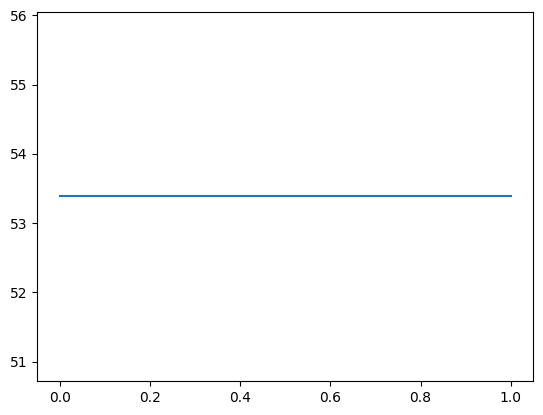

In [55]:
dx_llista=[0]
x=0
for i in range(1,N):
  x+=dx
  dx_llista.append(x)

ys= Euler_explícit(T_i, t_f, dt_1, dx)

plt.ylim(min(ys),max(ys))
plt.plot(dx_llista, ys)
plt.show()